### Import dependencies

In [1]:
import matplotlib.pyplot as plt #Library for general visualizations
import seaborn as sns #For more beautiful visualizations
import numpy as np #Library that handles mathematical operations
import pandas as pd #Working with .csv files

#Magic command to the jupyter notebook that we want all visualizations to stay within the file
%matplotlib inline

### Dataset exploration

In [2]:
#Importing dataset from the csv
customers_data = pd.read_csv("Mall_Customers.csv")

In [3]:
#Show first few data rows from the dataset
customers_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


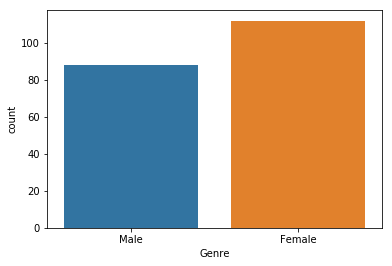

In [4]:
#Showing the number of females and males in the dataset
ax = sns.countplot(customers_data.Genre,label="Count")

### Plotting the Income vs Spending score graph

Text(0,0.5,'Spending Score (1-100)')

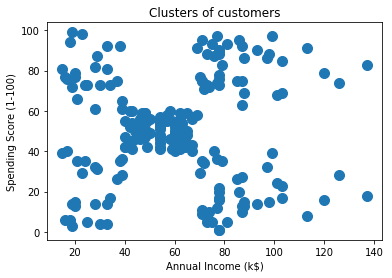

In [5]:
plt.scatter(customers_data['Annual Income (k$)'], customers_data['Spending Score (1-100)'], s=100)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

### Preprocessing


#### Load the dataset again

In [6]:
dataset = pd.read_csv("Mall_Customers.csv")

In [7]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Delete (drop) the CustomerID column

In [8]:
dataset = dataset.drop('CustomerID', axis=1)

In [9]:
dataset.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### Transorming sex column from String to Int

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
print(dataset.Genre.head())

0      Male
1      Male
2    Female
3    Female
4    Female
Name: Genre, dtype: object


In [12]:
encode = LabelEncoder()
encoded_gender = encode.fit_transform(dataset.Genre)
print(encoded_gender[:5])

[1 1 0 0 0]


In [13]:
dataset['Genre'] = encoded_gender

In [14]:
dataset.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


#### Dimensionality reduction

In [15]:
dataset.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [16]:
from sklearn.decomposition import PCA

In [17]:
pca_reducer = PCA(n_components=2)

In [18]:
dataset = pca_reducer.fit_transform(dataset)

In [19]:
dataset[:5]

array([[-31.86994476, -33.00125207],
       [  0.76449405, -56.84290063],
       [-57.40827565, -13.1249607 ],
       [ -2.16854252, -53.47859   ],
       [-32.17408464, -30.38841187]])

### KMeans using Sklearn library

In [20]:
from sklearn.cluster import KMeans

In [21]:
km = KMeans(n_clusters=5)

### Training the model

In [22]:
#Training the model
cluster = km.fit(dataset)

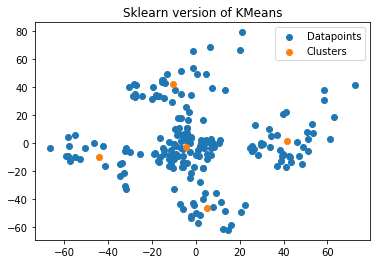

In [23]:
#Showing the centroids on the dataset
plt.scatter(dataset[:, 0], dataset[:, 1], label='Datapoints')
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

### Evaluating the KMeans

In [24]:
#Using the KMeans to predict over dataset
predicted = km.predict(dataset)

#### Getting data for each cluster

In [25]:
#Splitting data into 5 separate parts (clusters)
cluster_one_data = dataset[predicted == 0]
cluster_two_data = dataset[predicted == 1]
cluster_three_data = dataset[predicted == 2]
cluster_four_data = dataset[predicted == 3]
cluster_five_data = dataset[predicted == 4]

#### Creating colored plot for each cluster

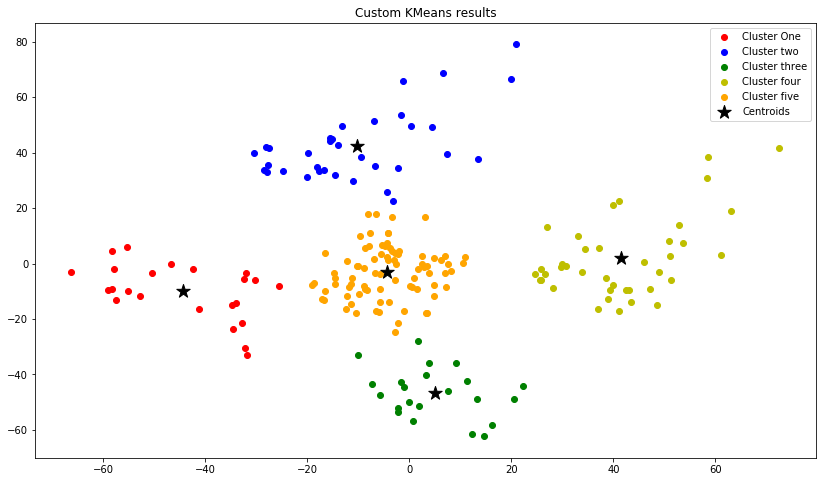

In [26]:
plt.figure(figsize=(14, 8))
plt.scatter(cluster_one_data[:, 0], cluster_one_data[:, 1], c='r', label='Cluster One')
plt.scatter(cluster_two_data[:, 0], cluster_two_data[:, 1], c='b', label='Cluster two')
plt.scatter(cluster_three_data[:, 0], cluster_three_data[:, 1], c='g', label='Cluster three')
plt.scatter(cluster_four_data[:, 0], cluster_four_data[:, 1], c='y', label='Cluster four')
plt.scatter(cluster_five_data[:, 0], cluster_five_data[:, 1], color='orange', label='Cluster five')
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], marker='*', s=200, color='black', label='Centroids')
plt.title("Custom KMeans results")
plt.legend()
plt.show()

## Analyse clusters

In [27]:
#Dropping unwanted column - CustomerID
customers_data = customers_data.drop("CustomerID", axis=1)

In [28]:
customers_data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [29]:
#Encoding gender
customers_data['Genre'] = encoded_gender

In [30]:
customers_data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [31]:
km_new = KMeans(n_clusters=5)

In [32]:
clusters_analysis = km_new.fit(customers_data.values)

In [33]:
predicted = km_new.predict(customers_data.values)

In [34]:
clus_data_1 = customers_data[predicted == 0]
clus_data_2 = customers_data[predicted == 1]
clus_data_3 = customers_data[predicted == 2]
clus_data_4 = customers_data[predicted == 3]
clus_data_5 = customers_data[predicted == 4]

Let's create table for each centroid so we can easly visualise data in clusters

In [35]:
#Creating DataFrames for each cluster 
cluster_1 = pd.DataFrame(clus_data_1, columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
cluster_2 = pd.DataFrame(clus_data_2, columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
cluster_3 = pd.DataFrame(clus_data_3, columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
cluster_4 = pd.DataFrame(clus_data_4, columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
cluster_5 = pd.DataFrame(clus_data_5, columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

### Cluster ONE data

In [36]:
cluster_1

,Genre,Age,Annual Income (k$),Spending Score (1-100)
123,1,39,69,91
125,0,31,70,77
127,1,40,71,95
129,1,38,71,75
131,1,39,71,75
133,0,31,72,71
135,0,29,73,88
137,1,32,73,73
139,0,35,74,72
141,1,32,75,93


In [39]:
print("Average age for customers in cluster one: {}".format(np.array(cluster_1['Age']).mean()))
print("Average annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_1['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousends) for customers in cluster one: {}".format(np.array(cluster_1['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_1.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_1.loc[(cluster_1['Genre'] == 1.0)].shape[0], cluster_1.loc[(cluster_1['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster one: 32.69230769230769
Average annual income (in thousands) for customers in cluster one: 86.53846153846153
Deviation of the mean for annual income (in thousends) for customers in cluster one: 16.10199247719673
In cluster one we have: 39 customers
From those customers we have 18 male and 21 female


### Cluster TWO Customers analysis

In [40]:
cluster_2

,Genre,Age,Annual Income (k$),Spending Score (1-100)
46,0,50,40,55
47,0,27,40,47
48,0,29,40,42
49,0,31,40,42
50,0,49,42,52
51,1,33,42,60
52,0,31,43,54
53,1,59,43,60
54,0,50,43,45
55,1,47,43,41


In [41]:
print("Average age for customers in cluster one: {}".format(np.array(cluster_2['Age']).mean()))
print("Average annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_2['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_2['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_2.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_2.loc[(cluster_2['Genre'] == 1.0)].shape[0], cluster_2.loc[(cluster_2['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster one: 43.282051282051285
Average annual income (in thousands) for customers in cluster one: 55.02564102564103
Deviation of the mean for annual income (in thousands) for customers in cluster one: 8.384929030438862
In cluster one we have: 78 customers
From those customers we have 33 male and 45 female


### Cluster THREE Customers analysis

In [42]:
cluster_3

,Genre,Age,Annual Income (k$),Spending Score (1-100)
124,0,23,70,29
128,1,59,71,11
130,1,47,71,9
132,0,25,72,34
134,1,20,73,5
136,0,44,73,7
138,1,19,74,10
140,0,57,75,5
142,0,28,76,40
144,1,25,77,12


In [43]:
print("Average age for customers in cluster one: {}".format(np.array(cluster_3['Age']).mean()))
print("Average annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_3['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_3['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_3.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_3.loc[(cluster_3['Genre'] == 1.0)].shape[0], cluster_3.loc[(cluster_3['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster one: 40.32432432432432
Average annual income (in thousands) for customers in cluster one: 87.43243243243244
Deviation of the mean for annual income (in thousands) for customers in cluster one: 16.05150584927216
In cluster one we have: 37 customers
From those customers we have 19 male and 18 female


### Cluster FOUR Customers analysis

In [44]:
cluster_4

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
2,0,20,16,6
4,0,31,17,40
6,0,35,18,6
8,1,64,19,3
10,1,67,19,14
12,0,58,20,15
14,1,37,20,13
16,0,35,21,35
18,1,52,23,29


In [45]:
print("Average age for customers in cluster one: {}".format(np.array(cluster_4['Age']).mean()))
print("Average annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_4['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_4['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_4.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_4.loc[(cluster_4['Genre'] == 1.0)].shape[0], cluster_4.loc[(cluster_4['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster one: 45.21739130434783
Average annual income (in thousands) for customers in cluster one: 26.304347826086957
Deviation of the mean for annual income (in thousands) for customers in cluster one: 7.720299513274676
In cluster one we have: 23 customers
From those customers we have 9 male and 14 female


### Cluster FIVE Customers analysis

In [46]:
cluster_5

,Genre,Age,Annual Income (k$),Spending Score (1-100)
1,1,21,15,81
3,0,23,16,77
5,0,22,17,76
7,0,23,18,94
9,0,30,19,72
11,0,35,19,99
13,0,24,20,77
15,1,22,20,79
17,1,20,21,66
19,0,35,23,98


In [47]:
print("Average age for customers in cluster one: {}".format(np.array(cluster_5['Age']).mean()))
print("Average annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_5['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_5['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_5.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_5.loc[(cluster_5['Genre'] == 1.0)].shape[0], cluster_5.loc[(cluster_5['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster one: 25.52173913043478
Average annual income (in thousands) for customers in cluster one: 26.304347826086957
Deviation of the mean for annual income (in thousands) for customers in cluster one: 7.720299513274676
In cluster one we have: 23 customers
From those customers we have 9 male and 14 female


### Conclusion:

Based on the data from clusters we can see that there are 3 clusters with totally different age of customers. Also it is more usual for older people to have bigger sallary which is as well shown in our results.

As we can see in the cluster 2, people around age 40 have the biggest salary. Based on that the most exclusive items should be directly promoted to people in that age. Younger people, around the age of 25, tend to have lower salaries, but as we can see from Cluster 5 there are people around age 28 whose salary is much bigger (almost double). 

Gender to target in this mall is of course: Females. They tend to buy more stuff, so promotions should be directed to them.


## Business side of Customer clustering

So the real question is how can we use this in our business? Based on the information from the clusters we can decide which strategy to run, what our target should be. There is also a ossibility to conduct an survey on the potential new strategy for one or two segments of customers. Based on that feedback we can decide whether the new strategy is good for that customer segment or not, even before the strategy is released.